In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Thesis Final Dataset.csv")

In [3]:
df

,op,ArsS,ArsR,FlgS,FlgR,s54,s28,HspR,HrcA,NtrC,NikR,Fur,gene
0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,1,0,0,0,1,0,0,0,0,0,0
2,2,0,0,2,0,0,0,0,0,1,0,0,0
3,3,0,0,0,0,1,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,4,0,0,0,1,1,0,0,0,0,0,0,1
1586,1,0,0,0,0,0,0,0,0,0,0,1,0
1587,1,0,0,0,0,0,0,0,0,1,0,0,0
1588,1,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
df['gene'].value_counts()

0    1099
1     491
Name: gene, dtype: int64

In [5]:
from imblearn.over_sampling import SMOTE

# load the dataset

# separate features (X) and target (y)
X = df.drop("gene", axis=1)
y = df["gene"]

# instantiate the SMOTE oversampler
sm = SMOTE(sampling_strategy='minority', random_state=42)

# fit and transform the dataset
X_resampled, y_resampled = sm.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['gene'] = y_resampled
df_resampled

,op,ArsS,ArsR,FlgS,FlgR,s54,s28,HspR,HrcA,NtrC,NikR,Fur,gene
0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,1,0,0,0,1,0,0,0,0,0,0
2,2,0,0,2,0,0,0,0,0,1,0,0,0
3,3,0,0,0,0,1,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,1,2,0,0,0,0,0,0,0,0,0,0,1
2194,4,0,1,0,0,0,0,0,0,1,0,0,1
2195,3,0,0,0,0,0,0,1,1,1,0,0,1
2196,3,2,1,0,0,0,0,0,0,0,0,0,1


In [6]:
df_resampled['gene'].value_counts()

1    1099
0    1099
Name: gene, dtype: int64

In [7]:
df_resampled = df_resampled.reset_index(drop= True)
X = df_resampled.drop('gene', axis=1)
y = df_resampled['gene']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
df_resampled

,op,ArsS,ArsR,FlgS,FlgR,s54,s28,HspR,HrcA,NtrC,NikR,Fur,gene
0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,1,0,0,0,1,0,0,0,0,0,0
2,2,0,0,2,0,0,0,0,0,1,0,0,0
3,3,0,0,0,0,1,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,1,2,0,0,0,0,0,0,0,0,0,0,1
2194,4,0,1,0,0,0,0,0,0,1,0,0,1
2195,3,0,0,0,0,0,0,1,1,1,0,0,1
2196,3,2,1,0,0,0,0,0,0,0,0,0,1


In [8]:
clf = tree.DecisionTreeClassifier()

In [9]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

# Make predictions on the testing dataset
y_pred = clf.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall*100)
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy*100)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1*100)

Recall: 85.76512455516014
Precision: 88.27838827838828
Accuracy: 86.9090909090909
F1 score: 86.91047580578267


In [11]:
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
# Make predictions on the testing dataset
y_pred = clf.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall*100)
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy*100)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1*100)

Recall: 87.72455089820359
Precision: 84.92753623188406
Accuracy: 85.9090909090909
F1 score: 85.90232451177816


In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Make predictions on the testing dataset
y_pred = clf.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall*100)
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy*100)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1*100)

Recall: 84.4311377245509
Precision: 87.85046728971963
Accuracy: 86.2121212121212
F1 score: 86.21006367410546


In [15]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [16]:
# Make predictions on the testing dataset
y_pred = clf.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall*100)
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy*100)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1*100)

Recall: 99.7005988023952
Precision: 52.358490566037744
Accuracy: 53.939393939393945
F1 score: 41.237791761503104


In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Make predictions on the testing dataset
y_pred = clf.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall*100)
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy*100)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1*100)

Recall: 84.4311377245509
Precision: 84.68468468468468
Accuracy: 84.3939393939394
F1 score: 84.39419020825102


In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

[14:28:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utsom\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\utsom\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utsom\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
# Make predictions on the testing dataset
y_pred = clf.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall*100)
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy*100)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1*100)

Recall: 83.53293413173652
Precision: 88.29113924050634
Accuracy: 86.06060606060606
F1 score: 86.05484465782972


In [21]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
clf = xgb.XGBClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



[14:28:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utsom\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\utsom\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [22]:
# Make predictions on the testing dataset
y_pred = clf.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall*100)
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy*100)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1*100)

Recall: 83.53293413173652
Precision: 88.29113924050634
Accuracy: 86.06060606060606
F1 score: 86.05484465782972


ADABOOST

In [23]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [24]:
# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall*100)
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy*100)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1*100)

Recall: 56.58682634730538
Precision: 94.9748743718593
Accuracy: 76.51515151515152
F1 score: 75.55525744077515


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(n_estimators=5, random_state=0)
gb = GradientBoostingClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
clf = VotingClassifier(estimators=[("rf", rf), ("gb", gb), ("dt", dt)], voting="hard")
clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=5,
                                                     random_state=0)),
                             ('gb', GradientBoostingClassifier(random_state=0)),
                             ('dt', DecisionTreeClassifier(random_state=0))])

In [26]:
# Make predictions on the testing dataset
y_pred = clf.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall*100)
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy*100)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1*100)

Recall: 84.13173652694611
Precision: 88.36477987421384
Accuracy: 86.36363636363636
F1 score: 86.35962876255296


In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




# create a list of classifiers
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier()
]

# initialize a dictionary to store the accuracy scores of the classifiers
classifier_accuracies = {}
for classifier in classifiers:
    clf = classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    classifier_accuracies[classifier.__class__.__name__] = accuracy_score(y_test, predictions)
# find the classifier with the highest accuracy
best_classifier = max(classifier_accuracies, key=classifier_accuracies.get)
print("The best classifier is: ", best_classifier)
print("The accuracy of the best classifier is: ", classifier_accuracies[best_classifier])


The best classifier is:  RandomForestClassifier
The accuracy of the best classifier is:  0.8621212121212121


In [28]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
# Preprocessing - Normalizing the features
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()
# Define the model architecture
clf = keras.Sequential()
clf.add(keras.layers.Dense(16, input_dim=X_train.shape[1], activation='relu'))
clf.add(keras.layers.Dense(16, activation='relu'))
clf.add(keras.layers.Dense(1, activation='sigmoid'))
clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
clf.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
49/49 [==============================] - 2s 12ms/step - loss: 0.6670 - accuracy: 0.6801 - val_loss: 0.6125 - val_accuracy: 0.7712
Epoch 2/100
49/49 [==============================] - 0s 5ms/step - loss: 0.5410 - accuracy: 0.8296 - val_loss: 0.5088 - val_accuracy: 0.8182
Epoch 3/100
49/49 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.8440 - val_loss: 0.4280 - val_accuracy: 0.8288
Epoch 4/100
49/49 [==============================] - 0s 9ms/step - loss: 0.3642 - accuracy: 0.8570 - val_loss: 0.3775 - val_accuracy: 0.8409
Epoch 5/100
49/49 [==============================] - 0s 10ms/step - loss: 0.3236 - accuracy: 0.8628 - val_loss: 0.3557 - val_accuracy: 0.8409
Epoch 6/100
49/49 [==============================] - 0s 6ms/step - loss: 0.3055 - accuracy: 0.8661 - val_loss: 0.3484 - val_accuracy: 0.8424
Epoch 7/100
49/49 [==============================] - 0s 7ms/step - loss: 0.2973 - accuracy: 0.8752 - val_loss: 0.3433 - val_accuracy: 0.8394
Epoch 8/100

Epoch 59/100
49/49 [==============================] - 0s 5ms/step - loss: 0.2544 - accuracy: 0.8934 - val_loss: 0.3347 - val_accuracy: 0.8561
Epoch 60/100
49/49 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.8966 - val_loss: 0.3365 - val_accuracy: 0.8455
Epoch 61/100
49/49 [==============================] - 0s 5ms/step - loss: 0.2544 - accuracy: 0.8914 - val_loss: 0.3354 - val_accuracy: 0.8545
Epoch 62/100
49/49 [==============================] - 0s 5ms/step - loss: 0.2561 - accuracy: 0.8901 - val_loss: 0.3355 - val_accuracy: 0.8470
Epoch 63/100
49/49 [==============================] - 0s 5ms/step - loss: 0.2538 - accuracy: 0.8921 - val_loss: 0.3324 - val_accuracy: 0.8606
Epoch 64/100
49/49 [==============================] - 0s 5ms/step - loss: 0.2527 - accuracy: 0.9005 - val_loss: 0.3361 - val_accuracy: 0.8455
Epoch 65/100
49/49 [==============================] - 0s 5ms/step - loss: 0.2530 - accuracy: 0.8921 - val_loss: 0.3366 - val_accuracy: 0.8470
Epoch 

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

from sklearn.metrics import precision_score

y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision*100))
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall*100))

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1-Score: {:.2f}%".format(f1*100))

Accuracy: 86.36%
21/21 [==============================] - 0s 2ms/step
Precision: 87.50%
Recall: 83.83%
F1-Score: 85.63%


In [30]:
print(df.columns)

Index(['op', 'ArsS', 'ArsR', 'FlgS', 'FlgR', 's54', 's28', 'HspR', 'HrcA',
       'NtrC', 'NikR', 'Fur', 'gene'],
      dtype='object')


In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np


X = df.drop("gene", axis=1).values
y = df["gene"].values 

# Create an MLP classifier with the best hyperparameters obtained from grid search
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='sgd',
    alpha=0.01,
    learning_rate='constant'
)

# Define the number of folds (k)
k = 4

# Define the k-fold cross validation object
kf = KFold(n_splits=k)

# Initialize an array to store the accuracy scores
scores = np.zeros(k)
accuracy = np.zeros(k)
# Loop over the folds
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the MLP classifier on the training data
    mlp.fit(X_train, y_train)
    
    # Evaluate the MLP classifier on the testing data
    scores[i] = mlp.score(X_test, y_test)
    
    y_pred = mlp.predict(X_test)
    accuracy[i] = np.mean(y_pred == y_test)
    print("Accuracy: [%d]=%0.2f" %(i,accuracy[i]))

from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Recall:", recall*100)
print("Precision:", precision*100)
print("F1-Score:", f1*100)


C:\Users\utsom\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: [0]=0.68


C:\Users\utsom\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: [1]=0.93


C:\Users\utsom\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: [2]=0.92
Accuracy: [3]=0.77
Accuracy: 0.82 (+/- 0.21)
Recall: 20.87912087912088
Precision: 50.0
F1-Score: 29.457364341085274


C:\Users\utsom\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

X = df_resampled.drop("gene", axis=1)
y = df_resampled["gene"]

# Reshape X to (number of samples, number of time steps, number of features)
X = np.reshape(X.values, (X.shape[0], 1, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = Sequential()
clf.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
clf.add(Dense(1, activation='sigmoid'))

clf.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.05), metrics=['accuracy'])
clf.fit(X_train, y_train, epochs=50, batch_size=6, verbose=8)

y_pred = clf.predict(X_test)

# Round y_pred to get binary predictions
y_pred = np.round(y_pred)

from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = clf.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", scores[1])
print("Recall:", recall*100)
print("Precision:", precision*100)
print("F1-Score:", f1*100)


Epoch 1/50


C:\Users\utsom\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
14/14 [==============================] - 1s 3ms/step
Accuracy: 0.8818181753158569
Recall: 91.5929203539823
Precision: 86.25
F1-Score: 88.8412017167382


In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

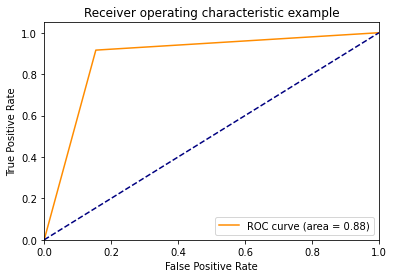

In [36]:
# calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

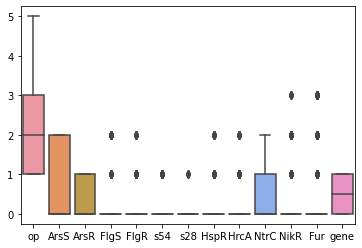

In [37]:
import seaborn as sns

# create box plots for each feature
sns.boxplot(data=df_resampled)
plt.show()

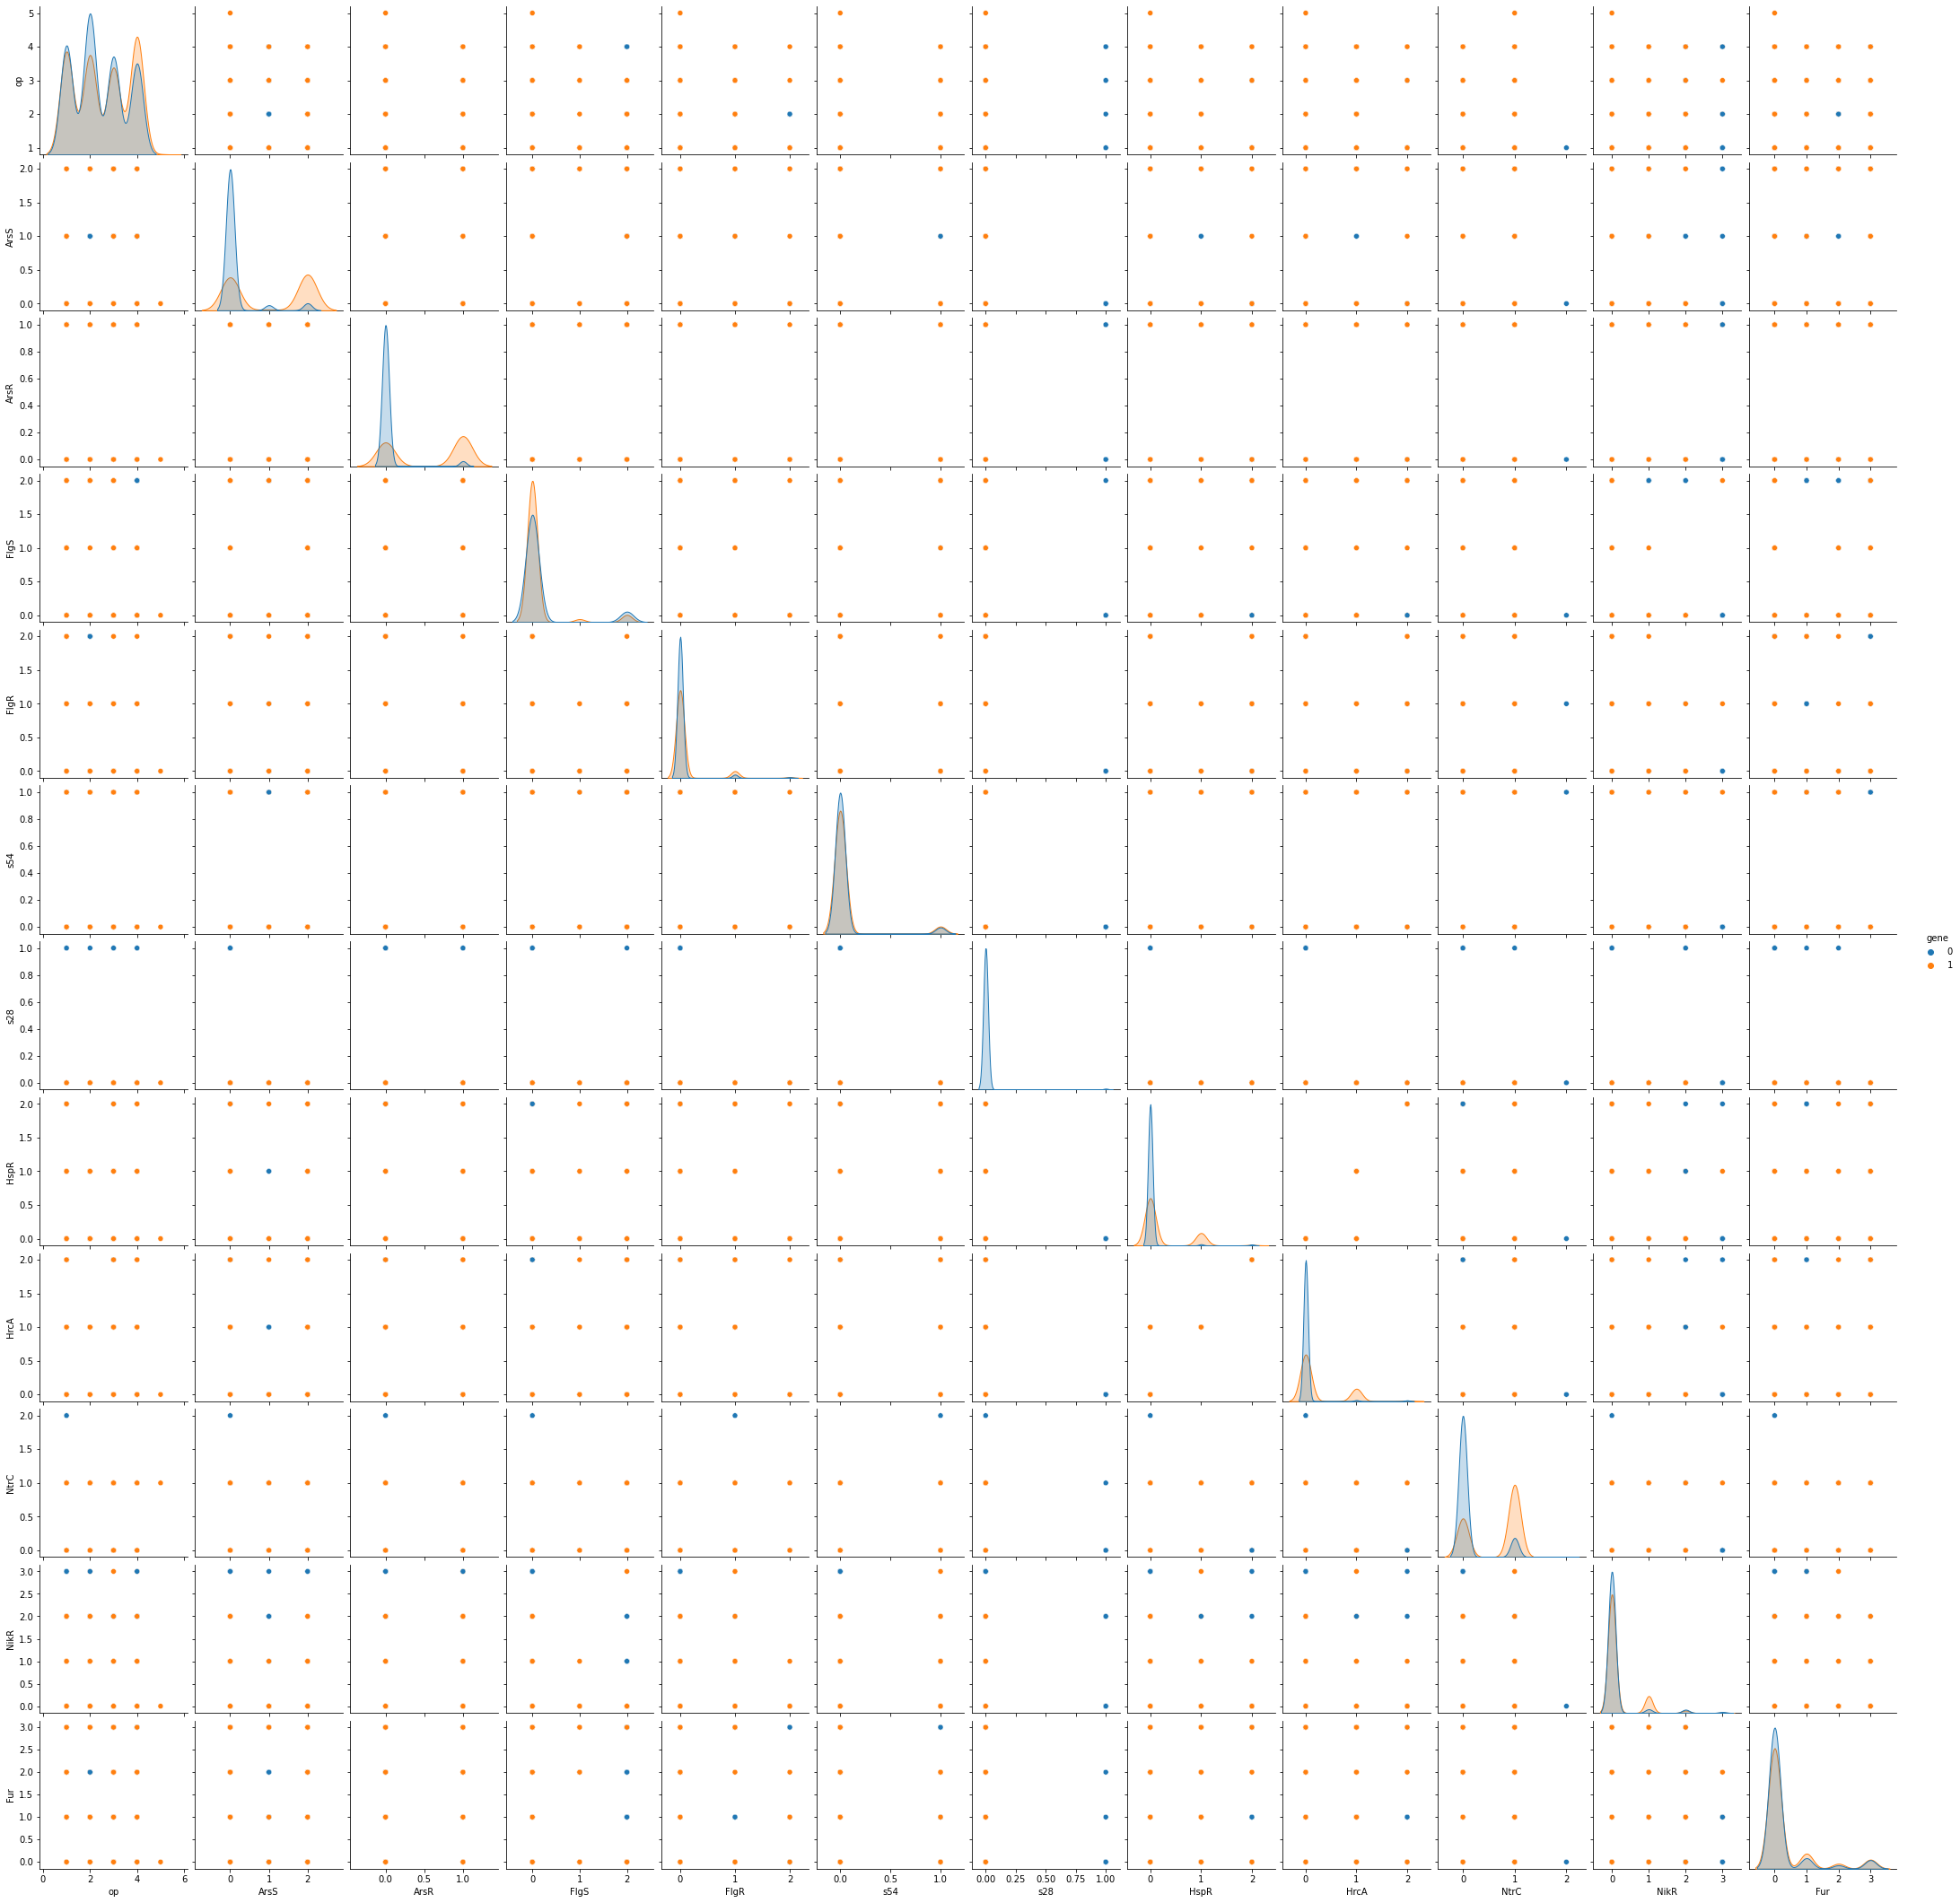

In [38]:
sns.pairplot(df_resampled, hue='gene')
plt.show()

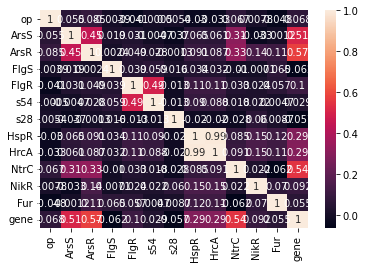

In [39]:
corr = df_resampled.corr()

# visualize the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()

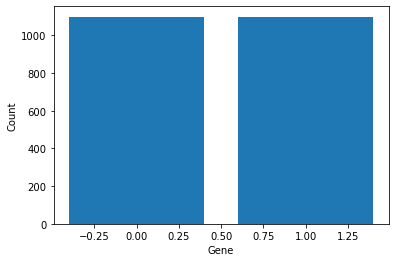

In [40]:
import matplotlib.pyplot as plt

# count the number of instances in each class
counts = df_resampled['gene'].value_counts()

# create a bar plot
plt.bar(counts.index, counts.values)
plt.xlabel('Gene')
plt.ylabel('Count')
plt.show()